# Wine Data Analysis

    A. Wine data set provides an information of quality of wine based on 11 other parameters.
    B. Process of analysing the wine data would be :-
        i. Converting the semi colon separated "csv" file into tabular format.
        ii. Understanding the wine's quality column - identifying various measures of central tendency.
        iii. Identify the correlation between various attributes with respect to Quality of wine.
        

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scp
import IPython.display as dp

def printics(string):
    dp.display(dp.Markdown(string))

import warnings
warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv("C:/Users/vdwivedi/Desktop/Data Science/attachment_attachment_attachment_Project_Datasets/Project Datasets/attachment_Project_3_Wine_Quality_data/Project_3_Wine Quality data/winequality.csv", delimiter =';')

In [117]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


A delimiter added while reading data helps in converting the file which is a comma separated value to a column separated value.

In [118]:
df.shape

(1599, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [120]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


a. Describe function in this calls helps in having a quick statistics of whichever column has numerical value.
b. Residual Sugar, free and total sulfur dioxide - 75% and max value has a huge difference ( extreme outliers for these cases)

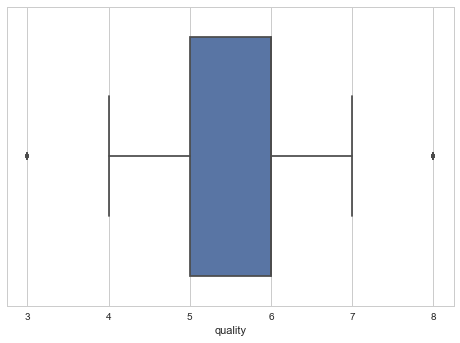

In [153]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df["quality"])
sns.plt.show()

The above information states that there are multiple outliers for quality. We would be interested in knwowing how many outliers are there in the system.

In [122]:
df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [123]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [141]:
print(df.quality.value_counts())
printics("*This shows that most wine quality is lying in 5 and 6*")

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


*This shows that most wine quality is lying in 5 and 6*

In [125]:
median_quality=df.quality.median()
print("Median for wine quality is :",median_quality)
printics("*Since the median is at 75% interquartile value hence it is not displayed in the box plot:*")

Median for wine quality is : 6.0


*Since the median is at 75% interquartile value hence it is not displayed in the box plot:*

In [126]:
df.quality.count()

1599

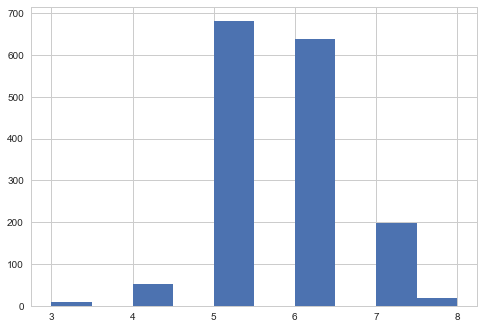

*So this shows that quality has total of 200+ data which is not in 25%-75% range.*

In [127]:
plt.hist(df.quality)
plt.show()
printics("*So this shows that quality has total of 200+ data which is not in 25%-75% range.*")

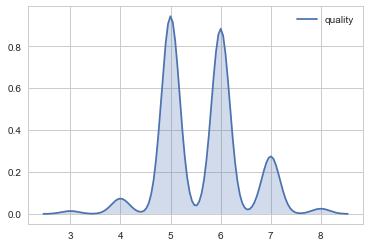

In [150]:
sns.kdeplot(df['quality'], shade = True)
sns.plt.show()

# Calculate the count of outliers in the Boxplot

The following code will help in finding number of outliers in terms of quality of wine.

In [144]:
#Interquartile range calculation
q25= df.quality.quantile(0.25)
print("25% value for wine quality:",q25)
q75 = df.quality.quantile(0.75)
print("75% value for wine quality:",q75)
iqr = q75-q25
print("Interquartile range value is:",iqr)

## Find the lower outlier counts 
outlier_low_value = df.quality<[q25-(iqr*1.5)] 
outlier_low_count =df.quality[outlier_low_value].count()
#outlier_low_count = df.quality[df.quality<(q25-iqr*1.5)].count()
print("Lower outlier value is:",outlier_low_count)

## Find the upper outlier counts
outlier_high_value = df.quality>[q75+1.5*iqr]
outlier_high_count = df.quality[outlier_high_value].count()
print("Upper outlier value is:",outlier_high_count)

# Final count of outliers
print("The total count of outliers in this case:" ,outlier_low_count + outlier_high_count)

25% value for wine quality: 5.0
75% value for wine quality: 6.0
Interquartile range value is: 1.0
Lower outlier value is: 10
Upper outlier value is: 18
The total count of outliers in this case: 28


# Using Scipy to generate the interquartile range.

In [129]:
iqr2= scp.iqr(df.quality)
print(iqr2)

1.0


# Finding correlation of other columns to the wine quality

In [143]:
df['fixed acidity'].corr(df['quality'])

0.12405164911322429

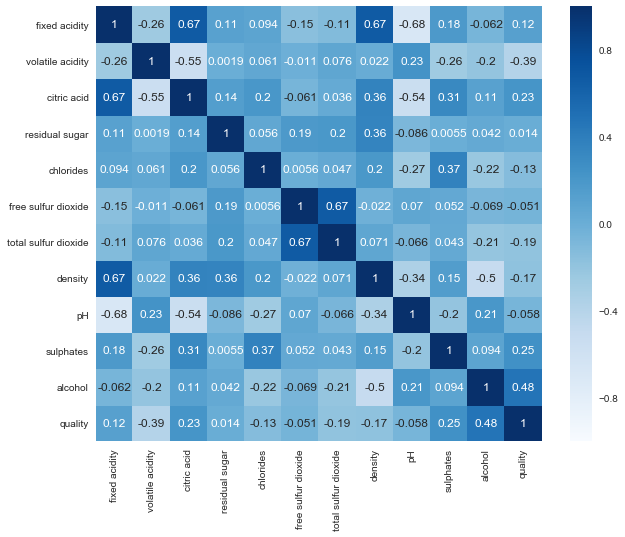

In [159]:
#Overall Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot = True)

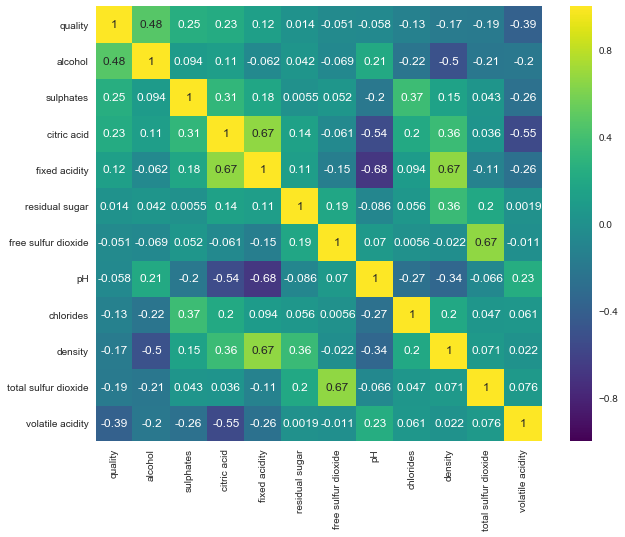

In [160]:
#Wine Quality Correlation matrix
k=12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm=df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True , cmap = 'viridis')

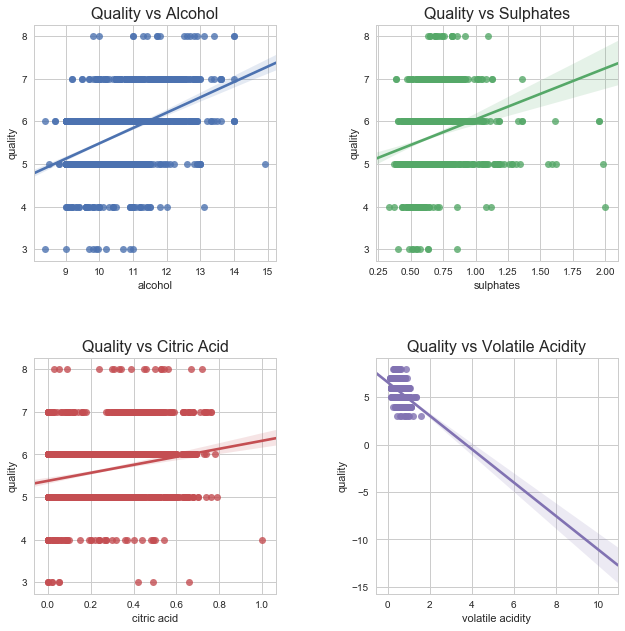

In [181]:
#Plotting the relation between quality and other correlated parameters
fig, axs = plt.subplots(4,4, figsize=(12,12))
ax1 = plt.subplot2grid((8,8),(0,0), rowspan=3 , colspan = 3)
ax2 = plt.subplot2grid((8,8),(0,4), rowspan=3, colspan = 3)
ax3 = plt.subplot2grid((8,8),(4,0), rowspan=3 , colspan = 3)
ax4 = plt.subplot2grid((8,8),(4,4), rowspan=3 , colspan = 3)
                       
ax1.set_title("Quality vs Alcohol", fontsize = 16)
ax2.set_title("Quality vs Sulphates", fontsize = 16)
ax3.set_title("Quality vs Citric Acid", fontsize = 16)
ax4.set_title("Quality vs Volatile Acidity", fontsize = 16)
                       
sns.regplot(x='alcohol',y='quality',data=df, ax=ax1)
sns.regplot(x='sulphates', y='quality',data=df,fit_reg=True, ax=ax2)
sns.regplot(x='citric acid', y='quality',data=df,fit_reg=True, ax=ax3) 
sns.regplot(x='volatile acidity', y='quality',data=df,fit_reg=True,ci=90, ax=ax4)
plt.show()

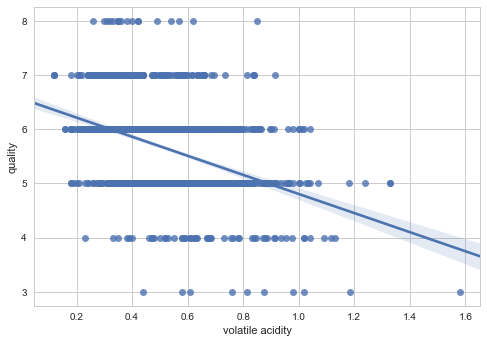

In [171]:
sns.regplot(x='volatile acidity', y='quality', data = df)
plt.show()

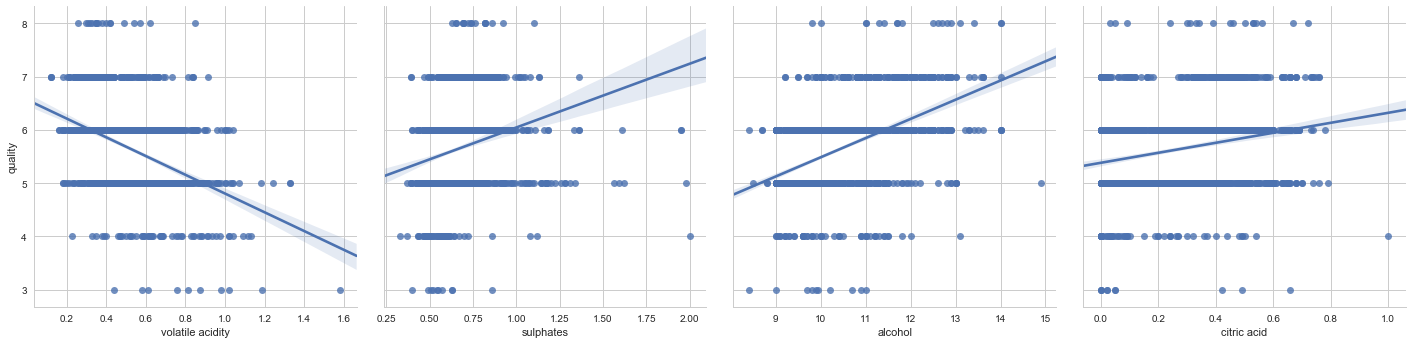

In [182]:
#Using pairplot to visualize the relation between quality and other correlated attributes
sns.pairplot(df,x_vars=['volatile acidity','sulphates','alcohol','citric acid'],y_vars=['quality'],kind='reg',size=5, aspect=1)
plt.show()